In [4]:
! pip install cohere altair > /dev/null
! pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/bf/f9/b6cf14c7168965efe9e30d2a920d8e4c209a0fabae37583847cf227cc87c/matplotlib-3.8.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fe/26/43821d61b7ee62c1809ec852bc572aaf4c27f101ebcebbbcce29a5ee0445/contourpy-1.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependenc

In [20]:
import cohere
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

api_key = "B4Y9fFbDFEyVyIuENyH0v4gDq6toQ9pALqW2g9ta"
co = cohere.Client(api_key)

# Turn text into embeddings

In [11]:
sentence1 = np.array(co.embed(["I like to be in my house"]).embeddings)
sentence2 = np.array(co.embed(["I enjoy staying home"]).embeddings)
sentence3 = np.array(co.embed(["the isotope 238u decays to 206pb"]).embeddings)
print("Embedding for sentence 1", sentence1)
print("Embedding for sentence 2", sentence2)
print("Embedding for sentence 3", sentence3)

Embedding for sentence 1 [[-1.3671875  -0.53808594  0.05929565 ...  0.6064453  -0.28979492
   0.68408203]]
Embedding for sentence 2 [[-0.38232422  2.3808594   2.5527344  ...  0.12548828 -0.91308594
   0.6538086 ]]
Embedding for sentence 3 [[-1.1621094  -1.9248047  -1.1660156  ... -2.9804688   1.5800781
   0.14941406]]


# Calculate dot products

In [15]:
from numpy import dot
print("Similarity between sentences 1 and 2:", dot(sentence1[0], sentence2[0]))
print("Similarity between sentences 1 and 3:", dot(sentence1[0], sentence3[0]))
print("Similarity between sentences 2 and 3:", dot(sentence2[0], sentence3[0]))

Similarity between sentences 1 and 2: 6736.825302722253
Similarity between sentences 1 and 3: -122.45237673246993
Similarity between sentences 2 and 3: -3.7202800890665344


# Calculate cosine similarities

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between sentences 1 and 2:", cosine_similarity(sentence1, sentence2)[0][0])
print("Cosine similarity between sentences 1 and 3:", cosine_similarity(sentence1, sentence3)[0][0])
print("Cosine similarity between sentences 2 and 3:", cosine_similarity(sentence2, sentence3)[0][0])



Cosine similarity between sentences 1 and 2: 0.7738154325337813
Cosine similarity between sentences 1 and 3: -0.014687618950875964
Cosine similarity between sentences 2 and 3: -0.00044649711930149286


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between sentences 1 and 1:", cosine_similarity(sentence1, sentence1)[0][0])
print("Cosine similarity between sentences 2 and 2:", cosine_similarity(sentence2, sentence2)[0][0])
print("Cosine similarity between sentences 3 and 3:", cosine_similarity(sentence3, sentence3)[0][0])

Cosine similarity between sentences 1 and 1: 1.0000000000000013
Cosine similarity between sentences 2 and 2: 0.9999999999999996
Cosine similarity between sentences 3 and 3: 1.0000000000000022


so instead of doing one by one for each, we can write a logic and do it in loop

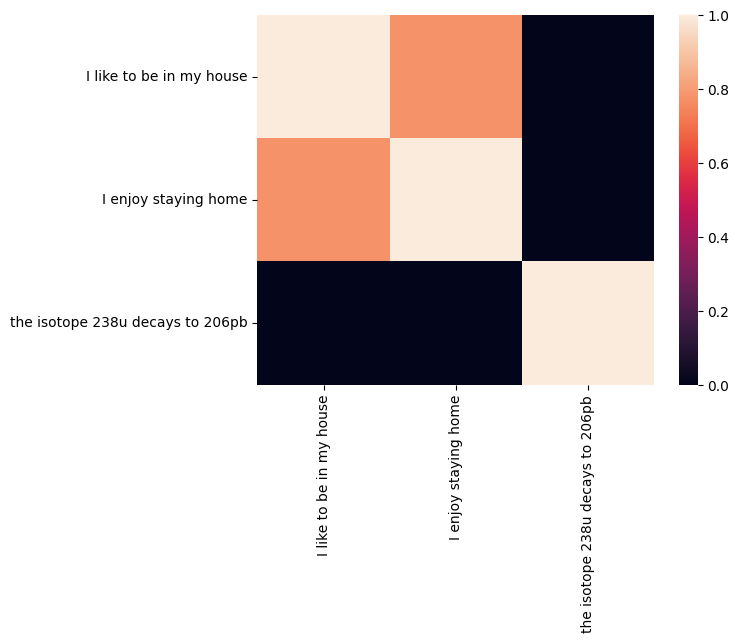

In [21]:
embeddings = [sentence1,sentence2,sentence3]

dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
dot_product_similarities

ax = sns.heatmap(dot_product_similarities,
                 vmin=0,
                 vmax=1,
                 xticklabels=["I like to be in my house", "I enjoy staying home", "the isotope 238u decays to 206pb"],
                 yticklabels=["I like to be in my house", "I enjoy staying home", "the isotope 238u decays to 206pb"],)